In [1]:
import torch
from torch import nn

print(torch.__version__)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


2.3.1+cu118
cuda


Random image path: datasets\ASL_Alphabet_Dataset\asl_alphabet_train\K\K2676.jpg
Image Class: K
Image Height: 200
Image Width: 200


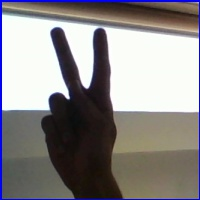

In [3]:
from pathlib import Path
import os
import random
from PIL import Image

# random.seed(42)
image_path = Path("datasets/ASL_Alphabet_Dataset/")
image_path_list = list(image_path.glob("*/*/*.jpg"))
# print(len(image_path_list))
random_image_path = random.choice(image_path_list)
# print(random_image_path)
# the image class is the name of the directory where iamges resides
image_class = random_image_path.parent.stem
# print(image_class)

img = Image.open(random_image_path)

# Print metadata
print(f'Random image path: {random_image_path}')
print(f'Image Class: {image_class}')
print(f'Image Height: {img.height}')
print(f'Image Width: {img.width}')
img

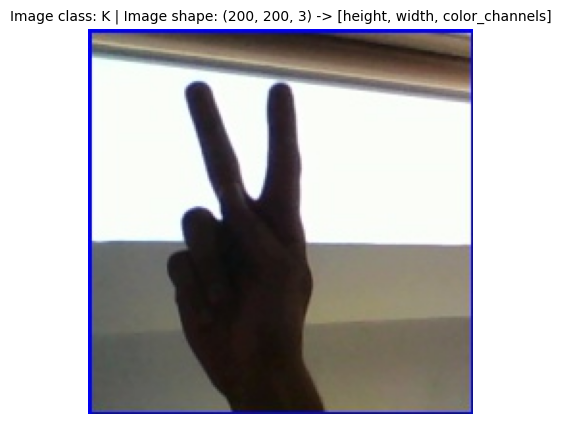

In [4]:
# Visualizing using matplotliib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
fig = plt.figure(figsize=(6, 5))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]", fontsize = 10)
plt.axis(False)
plt.show()

In [5]:
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms

print(torchvision.__version__)

# Transform image
data_transform = transforms.Compose([
    transforms.Resize(size = (128, 128)),         # Resize our images to 224x224
    transforms.ToTensor()
])


transformed_data = data_transform(img)
transformed_data, transformed_data.shape, transformed_data.dtype

0.18.1+cu118


(tensor([[[0.0000, 0.0157, 0.0118,  ..., 0.0314, 0.0314, 0.0039],
          [0.0314, 0.2549, 0.3373,  ..., 0.4157, 0.4549, 0.2000],
          [0.0353, 0.3647, 0.5176,  ..., 0.4902, 0.5059, 0.2353],
          ...,
          [0.0196, 0.2275, 0.3333,  ..., 0.5020, 0.4824, 0.2118],
          [0.0196, 0.2196, 0.3137,  ..., 0.4824, 0.4627, 0.2000],
          [0.0039, 0.0941, 0.1490,  ..., 0.2078, 0.1961, 0.0784]],
 
         [[0.0039, 0.0118, 0.0157,  ..., 0.0078, 0.0039, 0.0078],
          [0.0039, 0.2314, 0.3216,  ..., 0.3843, 0.4275, 0.2000],
          [0.0078, 0.3490, 0.4941,  ..., 0.4353, 0.4588, 0.2157],
          ...,
          [0.0157, 0.2392, 0.3490,  ..., 0.4745, 0.4627, 0.2118],
          [0.0118, 0.2314, 0.3373,  ..., 0.4627, 0.4510, 0.2039],
          [0.0157, 0.1059, 0.1569,  ..., 0.2118, 0.2039, 0.1059]],
 
         [[0.9608, 0.9137, 0.8863,  ..., 0.8980, 0.9176, 0.9333],
          [0.9176, 0.8000, 0.6706,  ..., 0.7098, 0.8314, 0.7843],
          [0.8863, 0.6784, 0.4784,  ...,

In [6]:
# Setup source directory
source_dir = 'datasets/ASL_Alphabet_Dataset/asl_alphabet_train/'

source_data = datasets.ImageFolder(root = source_dir,
                                  transform = data_transform, # Transforms input data into tensors
                                  target_transform = None)    # Transform labels into none

source_data

Dataset ImageFolder
    Number of datapoints: 223074
    Root location: datasets/ASL_Alphabet_Dataset/asl_alphabet_train/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [7]:
from torch.utils.data import random_split

train_size = int(0.8 * len(source_data))
test_size = len(source_data) - train_size

# Split the dataset into train and test sets
train_data, test_data = random_split(source_data, [train_size, test_size])

print(f"Train set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 178459
Test set size: 44615


In [8]:
# Get class names as list and dict 
class_names = source_data.classes
class_dict = source_data.class_to_idx
class_dict

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [9]:
# Index on the train_data Dataset to get a single iamge and label
img, label = train_data[0][0], train_data[0][1]

img, img.dtype, label, type(label), class_names[label]

(tensor([[[0.0039, 0.0235, 0.0235,  ..., 0.0314, 0.0275, 0.0118],
          [0.0157, 0.2196, 0.3176,  ..., 0.2784, 0.3529, 0.1608],
          [0.0275, 0.3059, 0.4275,  ..., 0.4863, 0.5059, 0.2275],
          ...,
          [0.0118, 0.4941, 0.7020,  ..., 0.5451, 0.5333, 0.2196],
          [0.0157, 0.4941, 0.6980,  ..., 0.5333, 0.5137, 0.2118],
          [0.0000, 0.2039, 0.2902,  ..., 0.2353, 0.2235, 0.0902]],
 
         [[0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0078, 0.0078],
          [0.0118, 0.1804, 0.2706,  ..., 0.2706, 0.3451, 0.1569],
          [0.0157, 0.2588, 0.3647,  ..., 0.4784, 0.5098, 0.2275],
          ...,
          [0.0196, 0.5490, 0.7725,  ..., 0.5490, 0.5451, 0.2510],
          [0.0157, 0.5333, 0.7569,  ..., 0.5333, 0.5216, 0.2353],
          [0.0157, 0.2314, 0.3255,  ..., 0.2314, 0.2275, 0.1176]],
 
         [[0.9804, 0.9098, 0.8784,  ..., 0.8863, 0.8980, 0.9216],
          [0.9020, 0.7176, 0.5843,  ..., 0.6078, 0.7765, 0.8039],
          [0.8667, 0.5765, 0.3412,  ...,

In [10]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)
img.shape, img_permute.shape

(torch.Size([3, 128, 128]), torch.Size([128, 128, 3]))

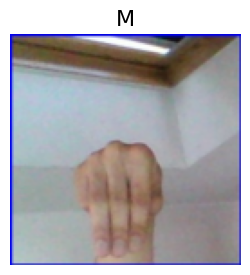

In [11]:
# Plot the image
plt.figure(figsize = (3, 3))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 16); 

In [12]:
# Train and test dataloaders
from torch.utils.data import DataLoader

BATCH_SIZE = 192
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = 1,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1,
                             shuffle = False)

len(train_dataloader), len(test_dataloader)

(930, 233)

In [13]:
img, label = next(iter(train_dataloader))

img.shape, label.shape     # {img.shape} -> [batch_size, color_channels, height, width]

(torch.Size([192, 3, 128, 128]), torch.Size([192]))

In [15]:
!py -m pip install efficientnet_pytorch torchinfo


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16483 sha256=ad3c8a2118a42a0415efb0c90326ac484684cb592830717b0adb980667007a0d
  Stored in directory: c:\users\207814636\appdata\local\pip\cache\wheels\29\16\24\752e89d88d333af39a288421e64d613b5f652918e39ef1f8e3
Successfully built efficientnet_pytorch


In [16]:
from efficientnet_pytorch import EfficientNet
from torchinfo import summary

num_classes = len(class_names)    # Number of classes

# Instantiate the EfficientNet model
model = EfficientNet.from_pretrained('efficientnet-b0').to(device)
model._fc = nn.Linear(model._fc.in_features, num_classes)  

summary(model=model,
        input_size=(192, 3, 128, 128),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to C:\Users\207814636/.cache\torch\hub\checkpoints\efficientnet-b0-355c32eb.pth
100.0%


Loaded pretrained weights for efficientnet-b0


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [192, 3, 128, 128]   [192, 29]            --                   True
├─Conv2dStaticSamePadding (_conv_stem)                       [192, 3, 128, 128]   [192, 32, 64, 64]    864                  True
│    └─ZeroPad2d (static_padding)                            [192, 3, 128, 128]   [192, 3, 129, 129]   --                   --
├─BatchNorm2d (_bn0)                                         [192, 32, 64, 64]    [192, 32, 64, 64]    64                   True
├─MemoryEfficientSwish (_swish)                              [192, 32, 64, 64]    [192, 32, 64, 64]    --                   --
├─ModuleList (_blocks)                                       --                   --                   --                   True
│    └─MBConvBlock (0)                                       [192, 32, 64, 64]    [192, 16, 64, 

In [17]:
# Trying forward pass to check the model
model(img.to(device))

tensor([[-0.1555, -0.4827,  0.1229,  ..., -0.1326, -0.4248, -0.4302],
        [-0.0933, -0.1091,  0.0226,  ..., -0.1029,  0.1018,  0.1937],
        [-0.2180, -0.5803,  0.1109,  ..., -0.3287,  0.6524, -0.7279],
        ...,
        [-0.4367, -0.0943, -0.0252,  ..., -0.2306, -0.2636, -0.4138],
        [-0.1808, -0.0488, -0.1077,  ..., -0.0670,  0.4772, -0.4078],
        [ 0.1442,  0.2205, -0.1814,  ...,  0.0448, -0.0613, -0.1260]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [18]:
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model, dataloader, loss_fn):
    model.eval()
    test_loss, test_acc = 0, 0

    # Turn on inference
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [20]:
!py -m pip install tqdm

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 4.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [21]:
from tqdm.auto import tqdm

def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs):

  # Create a empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss":[],
             "test_acc": []}

  # Loop through training and testing steps for no of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       optimizer = optimizer,
                                       loss_fn = loss_fn)

    test_loss, test_acc = test_step(model = model,
                                     dataloader = test_dataloader,
                                     loss_fn = loss_fn)

    print(f'Epoch: {epoch} | Train loss: {train_loss:.4f} - Train acc: {(train_acc*100):.2f}% -  Test loss: {test_loss:.4f} - Test acc: {(test_acc*100):.2f}%')

    # Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

c:\Users\207814636\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
# Setup loss functions and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.001)

In [23]:
# Set random seed
# torch.manual_seed(42)
EPOCHS = 5

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model
model_results = train(model = model,
                      train_dataloader = train_dataloader,
                      test_dataloader = test_dataloader,
                      optimizer = optimizer,
                      loss_fn = loss_fn,
                      epochs = EPOCHS)

# End the timer and print duration of training
end_time = timer()
print(f'Total Train Time: {end_time - start_time:.3f} seconds')

  0%|          | 0/5 [30:49<?, ?it/s]


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
